In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

In [2]:
df = pd.read_csv(r'../data/fsp_case_31_BSD.csv', index_col = 0, header = [0,1])

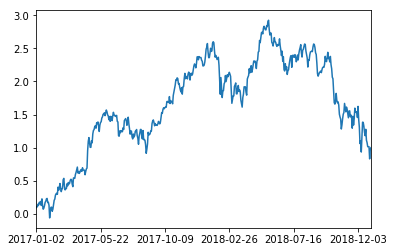

In [10]:
#get the last 10 indices return
df.columns
ret_idx = ['ret.'+str(i) for i in range(147,157)]
# company_returns = copy.deepcopy(df[ret_idx][1:].astype(float))
company_returns = copy.deepcopy(df['ret'].iloc[:,-10:])
training = company_returns.iloc[:260]
testing = company_returns.iloc[260:]
# print(training.info())

# company_returns.cumsum(axis=0).sum(axis=1).plot()

In [4]:
#compute optimal weight 
C = training.cov()
# print(C)
C_inv = pd.DataFrame(np.linalg.pinv(C.values), C.columns, C.index)

C_inv_list = C_inv.values.tolist()
e = np.asarray([1 for x in range(10)])

In [5]:
thing = np.matmul(C_inv_list, e)

w_opt = thing/sum(thing)
w_m = [1/10 for x in range(10)]
# print(w_opt)
# print("var is ", 1/sum(thing))


In [6]:
# print("plotting cumulative return")
# test_cumsum = testing.cumsum(axis=0).sum(axis=1)

# wm_cum_ret = testing.cumsum(axis=0).sum(axis=1)/10


# test_cumsum.plot()
# wm_cum_ret.plot()
# print(test_cumsum)
# print(wm_cum_ret)

0.0014532270387243493
0.0008287808216735852


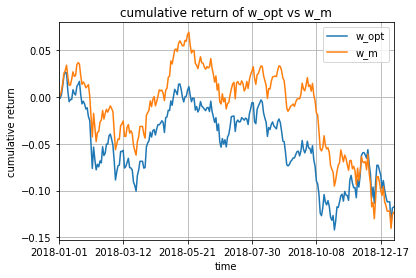

In [9]:
w_opt_cum_ret = np.cumsum(copy.deepcopy(testing))
w_m_cum_ret = np.cumsum(copy.deepcopy(testing))

# print(type(w_opt_cum_ret))

# print(w_opt_cum_ret.iloc[:,0])
# print(w_opt_cum_ret.iloc[15])
# for i in range(147,157):
#     w = w_opt[i-147]
#     w_opt_cum_ret['ret.'+str(i)] = w_opt_cum_ret['ret.'+str(i)]*w
#     w_m_cum_ret['ret.'+str(i)] = w_m_cum_ret['ret.'+str(i)]*0.1
for i in range(10):
    w = w_opt[i]
    w_opt_cum_ret.iloc[:,i] = w*w_opt_cum_ret.iloc[:,i]
    w_m_cum_ret.iloc[:,i] = 0.1*w_m_cum_ret.iloc[:,i]
#     w_opt_cum_ret.iloc[] = w_opt_cum_ret['ret.'+str(i)]*w
    
# np.cumsum(w_opt_cum_ret)
    
# w_opt_cum_ret.cumsum(axis=0).sum(axis=1).plot()
# w_m_cum_ret.cumsum(axis=0).sum(axis=1).plot()
w_opt_cum_ret.sum(axis=1).plot()
w_m_cum_ret.sum(axis=1).plot()
plt.grid()
plt.title("cumulative return of w_opt vs w_m")
plt.ylabel("cumulative return")
plt.xlabel("time")
plt.legend(["w_opt", "w_m"])
plt.savefig("../result/3_1_2_a.eps",dpi=1200)


plt.figure
print((w_opt_cum_ret.var(axis=0).sum()))
print((w_m_cum_ret.var(axis=0).sum()))